# **CS412 - Machine Learning - Fall 2025**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Gain experience with text processing


## **Dataset**
This dataset is taken from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com) and modified for Homework 1. It provides data on patient reviews on specific drugs along with related conditions and a patient rating reflecting overall satisfaction.



Columns:

**drugName:** Name of the drug

**rating:** Patient rating of the drug over 10 stars

**review:** Patient review of the drug

**usefulCount:** Number of users who found the review useful

**condition:** Name of the condition




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.

You must use 80% of the data for training and 20% for test.


## **Task**
Build a decision tree classifier using the Scikit-Learn library to predict conditions - given in **Target column** condition.


## **Software: You may find the necessary function references here:**
https://scikit-learn.org/1.5/api/sklearn.feature_extraction.html

http://scikit-learn.org/stable/supervised_learning.html


## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. Submit the ipynb to SuCourse.



## 1) Load the Dataset

*   Read the .csv file with the pandas library


In [2]:
# Code here
import pandas as pd

df = pd.read_csv('/Users/bartusisman/Desktop/SABANCI-CS/CS412/hw1/CS412 HW1 Dataset.csv')



## 2) Understanding the dataset & Preprocessing (30 pts)

Understanding the Dataset: (10 pts)


> - Find the shape of the dataset (number of samples & number of attributes) (Hint: You can use the **shape** function).

> - Display variable names (both dependent and independent).

> - Display the summary of the dataset (Hint: You can use the **info** function).

> - Display the first 5 rows from training dataset (Hint: You can use the **head** function).




Preprocessing: (20 pts)


> - Check if there are any missing values in the dataset. If there are, drop these values.

> - Process the text data. Use the **TfidfVectorizer** from the Scikit-Learn Library. Using the **TfidfVectorizer** function, remove stop words by setting **stop_words="english"** and limit your vocabulary by setting **max_features=1000**.

> - Encode categorical data (Hint: You can use the **LabelEncoder** from the Scikit-Learn Library).



In [3]:
# Code here

# Understanding the Dataset

# 1. Shape of the dataset
print("Dataset Shape:")
print(df.shape)

# 2. Variable names
print("\nVariable Names:")
print(df.columns.tolist())

# 3. Dataset summary
print("\nDataset Summary:")
print(df.info())

# 4. First 5 rows
print("\nFirst 5 rows:")
print(df.head())



# Preprocessing
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# 1. Check for different types of missing values
print("Basic null check:")
print(df.isnull().sum())

print("\nCheck for empty strings:")
for column in df.columns:
    empty_count = (df[column] == '').sum()
    if empty_count > 0:
        print(f"{column}: {empty_count} empty strings")

print("\nCheck for whitespace-only strings:")
for column in df.columns:
    if df[column].dtype == 'object':  # only check string columns
        whitespace_count = (df[column].str.isspace() == True).sum()
        if whitespace_count > 0:
            print(f"{column}: {whitespace_count} whitespace-only strings")

print("\nCheck for 'NaN', 'NA', 'null' strings:")
for column in df.columns:
    if df[column].dtype == 'object':
        nan_count = df[column].str.lower().isin(['nan', 'na', 'null']).sum()
        if nan_count > 0:
            print(f"{column}: {nan_count} NaN/NA/null strings")

# Display some basic statistics
print("\nBasic statistics:")
print(df.describe(include='all'))

# Check for suspicious values
print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column} unique values:", df[column].nunique())
    if df[column].dtype == 'object':
        print("Sample of values:", df[column].value_counts().head(3))

# 2. Process text data
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
text_features = tfidf.fit_transform(df['review'])

# 3. Encode categorical data
le = LabelEncoder()
df['condition_encoded'] = le.fit_transform(df['condition'])
df['drugName_encoded'] = le.fit_transform(df['drugName'])

Dataset Shape:
(98723, 5)

Variable Names:
['drugName', 'condition', 'review', 'rating', 'usefulCount']

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98723 entries, 0 to 98722
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     98723 non-null  object
 1   condition    98723 non-null  object
 2   review       98723 non-null  object
 3   rating       98723 non-null  int64 
 4   usefulCount  98723 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB
None

First 5 rows:
                             drugName        condition  \
0                          Guanfacine             ADHD   
1                              Lybrel    Birth Control   
2                          Ortho Evra    Birth Control   
3                        Aripiprazole  Bipolar Disorde   
4  Ethinyl estradiol / levonorgestrel    Birth Control   

                                              review  rating  us

## 3) Define X and y. Split the dataset. (10 pts)

> - Define X and y. (5 pts)
>   
> - Split the data into training and test sets (Hint: Use the **train_test_split** method from **sklearn.model_selection**). (5 pts)


In [4]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# Define X (features)
# Combine TF-IDF features with other numerical features
numerical_features = df[['rating', 'usefulCount', 'drugName_encoded']].values
# Combine text features with numerical features
X = hstack((text_features, numerical_features))

# Define y (target)
y = df['condition_encoded']

# Split the dataset (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for test set
    random_state=42   # for reproducibility
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (78978, 1003)
Test set shape: (19745, 1003)


## 4) Tune Hyperparameters (15 pts)


> - Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 3. Use validation accuracy to pick the best hyperparameter values. (10 pts)
>   
> - Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defines the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Controls tree depth
    'min_samples_split': [2, 5, 10, 20]  # Minimum samples required to split
}

# Creates basic decision tree
dt = DecisionTreeClassifier(random_state=42)

# Sets up grid search
grid_search = GridSearchCV(
    estimator=dt,          # Our decision tree
    param_grid=param_grid, # All settings to try
    cv=3,                  # Test each 3 times
    scoring='accuracy'     # Measure how often it's correct
)

# Tries all combinations
grid_search.fit(X_train, y_train)

# Shows best settings found
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 20, 'min_samples_split': 2}


**Fill the blanks below:**

> - I chose to tune hyperparameters max depth, and min samples split.
> - I chose these hyperparameters because max depth will prevent over fitting whereas min samples split helps controlling the model's complexity.


## 5) Re-train the decision tree with the hyperparameters you have chosen (10 pts)

 > - Re-train model with the hyperparameters you have chosen in part 4. (5 pts)

 >  - Report training accuracy. (5 pts)

In [7]:
# 1. Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# 2. Create a new decision tree with best parameters
best_tree = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# 3. Train the model with best parameters
best_tree.fit(X_train, y_train)

# 4. Calculate and report training accuracy
training_accuracy = best_tree.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")



Training Accuracy: 0.8430


## 6) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 5. (5 pts)
- Report the classification accuracy. (5 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (10 pts)
> The model most frequently mistakes class(es) Absorica for class(es) Acetaminophen.



Test Accuracy: 0.7813

Most frequently confused classes:
True class 'Absorica' is most often predicted as 'Acetaminophen'
Number of occurrences: 477


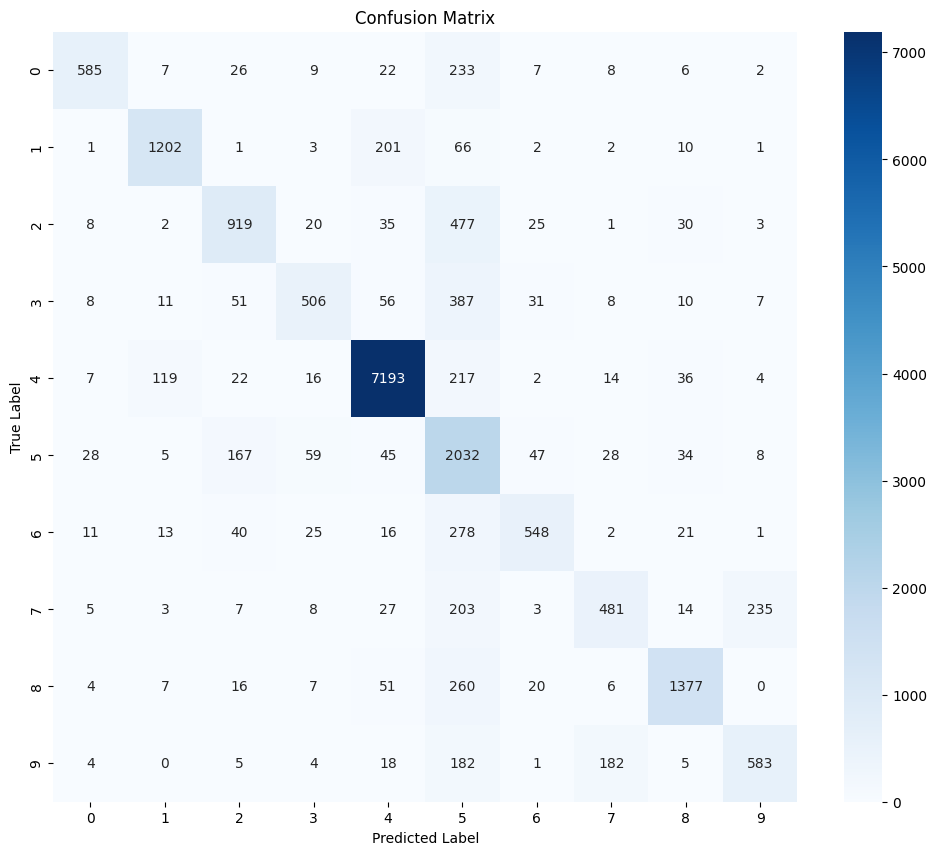

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test set
y_pred = best_tree.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# To find the most confused classes
# Get the indices of the maximum value in confusion matrix (excluding diagonal)
np.fill_diagonal(cm, 0)  # Set diagonal to 0 to find max off-diagonal value
max_confusion = np.unravel_index(np.argmax(cm), cm.shape)

# Convert encoded labels back to original class names
most_confused_true = le.inverse_transform([max_confusion[0]])[0]
most_confused_pred = le.inverse_transform([max_confusion[1]])[0]

print(f"\nMost frequently confused classes:")
print(f"True class '{most_confused_true}' is most often predicted as '{most_confused_pred}'")
print(f"Number of occurrences: {cm[max_confusion]}")

plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) Absoric for class(es) Acetaminophen.

## 7) Find the information gain on the first split (15 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
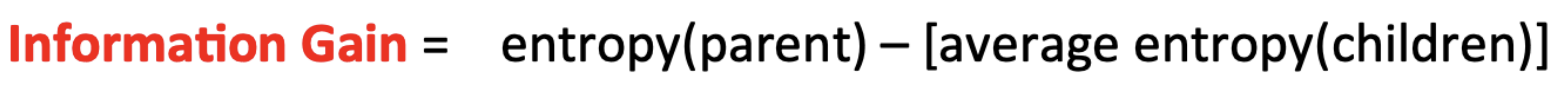



In [17]:
import numpy as np

def calculate_entropy(y):
    """Calculate entropy of a node"""
    # Gets probability distribution of classes
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    # Calculates entropy using the formula: -sum(p * log2(p))
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Gets the root node (parent) entropy
parent_entropy = calculate_entropy(y_train)

# Gets the feature used for the first split
root_feature = best_tree.tree_.feature[0]
threshold = best_tree.tree_.threshold[0]

# Splits the data based on the root node's condition
if root_feature < X_train.shape[1] - 3:  # If it's a TF-IDF feature
    feature_values = X_train[:, root_feature].toarray().flatten()
else:  # If it's one of the numerical features
    feature_values = X_train[:, root_feature].toarray().flatten()

left_mask = feature_values <= threshold
right_mask = feature_values > threshold

# Calculates the weighted average entropy of children
left_entropy = calculate_entropy(y_train[left_mask])
right_entropy = calculate_entropy(y_train[right_mask])

# Calculates the weights based on the proportion of samples
left_weight = sum(left_mask) / len(y_train)
right_weight = sum(right_mask) / len(y_train)

weighted_child_entropy = (left_weight * left_entropy) + (right_weight * right_entropy)

# Calculates the information gain
information_gain = parent_entropy - weighted_child_entropy

print(f"Parent Entropy: {parent_entropy:.4f}")
print(f"Weighted Children Entropy: {weighted_child_entropy:.4f}")
print(f"Information Gain: {information_gain:.4f}")


Parent Entropy: 2.8484
Weighted Children Entropy: 2.5666
Information Gain: 0.2818
